In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import time
import copy

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
# load modules related to this exercise

# load general packages
import numpy as np
# load modules related to this exercise
from model_zucher import zurcher
from Solve_NFXP import solve_NFXP
import estimate_NFXP as estimate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 2

#### 1. Ensure that you understand the code zucher.sim_data

#### 2. Illustrate the likelihood function for different values of RC and c

In [3]:
# Simulate the data

# Set up
model = zurcher()
solver = solve_NFXP()

# update starting value: 
N = 1000
T = 500
ev0 = np.zeros((model.n))
ev,pk = solver.poly(model.bellman, ev0, beta = model.beta, output=2)

# data
data = zurcher.sim_data(model,N,T,pk) 
samplesize = data.shape[0]


In [4]:
# Find tha likelihood value for different combinations 
ev = np.zeros((model.n))
par_RC = copy.copy(model.RC)
par_c = copy.copy(model.c)

NRC = 30
Nc = 20

log_lik = np.nan + np.zeros((NRC,Nc))
RC= np.linspace(8,15,NRC)
c = np.linspace(1,4,Nc)

for i in range(NRC):
    for j in range(Nc):
       
        # STEP 1: Find p 
        tabulate = data.dx1.value_counts()
        p = [tabulate[i]/sum(tabulate) for i in range(tabulate.size-1)]

        # STEP 2: Estimate structual parameters
        model.p = p # Use first step estimates as starting values for t
    
        # Estimate RC and C
        pnames = ['RC','c']
        theta = np.array([RC[i], c[j]])
        log_lik[i,j]=estimate.ll(theta,model, solver,data, pnames, no_guess = True)

log_lik *= samplesize*(-1)

#Re-inset the true parameters 
model.RC = copy.copy(par_RC)
model.c = copy.copy(par_c)

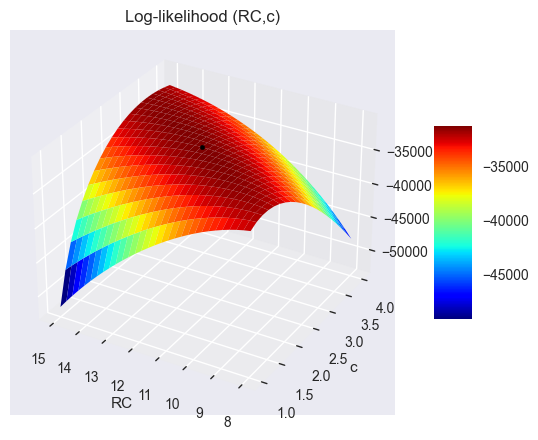

In [5]:
# plot figure in three dimensions
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('seaborn-v0_8')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d', computed_zorder=False)

# Make data.
X, Y = np.meshgrid(RC, c,indexing='ij')
x, y = np.unravel_index(np.argmax(log_lik), log_lik.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, log_lik, cmap=cm.jet)

#Plot max value
max = ax.scatter(RC[x], c[y], log_lik[x,y], color=['black'], marker='o', s=10)

# Customize the axis.
ax.set_xlabel(f'RC')
ax.set_ylabel(f'c')
ax.set_title(f'Log-likelihood (RC,c)')
ax.invert_xaxis()

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### 3. Estimate the model, do you get the correct estimates?

a) Try changing the starting values, does the model converges?

#### 4. What happen if you change the maximum number of Newton-Kantorovich iterations to 1? 
Do we get convergence? Do the estimates seem right? 
